In [1]:
from __future__ import division
import pdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #
sns.set_style("white")
sns.set_style("ticks")
#import meanderpyPM_MTD_Jan2021Amazon_solvecutoffissue as mp  #crdist was changed as was find cutoffs 
#import meanderpyPM_MTD_Jan2021 as mp
import meanderpyPM_MTD_SolveCutoffissue as mp #also used to make Amazon J trajectory
import pickle as pickle
np.set_printoptions(threshold=100000)
import os as os
from imp import reload
%matplotlib qt

%load_ext autoreload


### LOAD PREVIOUS MODEL

In [2]:
#LOAD IN ZAIRE-LIKE CHANNEL BELT MODEL
file=open('BeninLike_Initial_Centerline', 'rb') #LOAD IN ZAIRE-LIKE CHANNEL BELT MODEL
chb=pickle.load(file)
ch=chb.channels[0]

### INPUT PARAMETERS

In [3]:
W = 600.0                    # channel width (m)
D = 60.0                     # channel depth (m)
pad = 20                    # padding (number of nodepoints along centerline)
deltas = W/3                # sampling distance along centerline
#deltas=150
saved_ts = 40            # which time steps will be saved         
Cf = 0.06                  # dimensionless Chezy friction factor
#crdist = 2.5*W               # threshold distance at which cutoffs occur
crdist = 2*W 
kl =   1.7/(365*24*60*60.0)   # migration rate constant (m/s) #1.5 no bends #1.7 one bend #3 lots of bends 
kv =  1.0E-11               # vertical slope-dependent erosion rate constant (m/s)
dt = 1*365*24*60*60.0 # 0.2 years
dens = 1000                  # density of water (kg/m3)
n_bends = 30                 # approximate number of bends you want to model
#Sl = 0.0175 # initial slope (matters more for submarine channels than rivers)
Sl=0
bthc = 0.25*D                 # Max thickness of deposited channel sand
#t1 = 500                    # time step when incision starts
#t2 = 700                    # time step when lateral migration starts
#t3 = 1400                    # time step when aggradation starts
#aggr_factor = 4e-9           # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)

print(f"Alpha ={1*2*Cf/D}")

print(f"Model on {np.arctan(Sl)*180/np.pi} degree incline")

Alpha =0.002
Model on 0.0 degree incline


### INPUT TRAJECTORY

In [4]:
#dzinput=(0,0,-0.4,-0.4,-0.4,-0.4,0,0,0.3,0.3,0.35,0.35)  
   
#timeinput=(0,2200,2201,2540,2541,2880,2881,3700,3701,3780,3781,4480)

#######AMAZON J Trajectory OLD########  #MTD IS AT ITN==1360
#dzinput=(0,0,0.25,0.25) 
   
#timeinput=(0,1040,1041,1640)

#######AMAZON J Trajectory OLD########  #MTD IS AT ITN==1360
#dzinput=(0,0,0.25,0.25) 
   
#timeinput=(0,840,841,1440)

#######AMAZON########
#dzinput=(0.35,0.35) 
   
#timeinput=(0,560)   
#######################

#######ZAIRELIKE - PAPER ONE#######################################
dzinput=(0,0,-0.4,-0.4,0,0)  
   
timeinput=(0,2200,2201,2880,2881,3700)
###############################################################

#######L Trajectroy kl17 High Sinuosity#######################################
#dzinput=(0,0)  
   
#timeinput=(0,3700)
###############################################################

#######L Trajectory Most Bends#######################################
#dzinput=(0,0,-0.4,-0.4,0,0)  
   
#timeinput=(0,2200,2201,2880,2881,4500)
###############################################################

#######BENINLIKE - PAPER ONE Modified#######################################
#dzinput=(0,0,-0.4,-0.4,0,0,0.3,0.3,0.3,0.3)  
   
#timeinput=(0,2200,2201,2880,2881,3700,3701,3780,3781,4480)
###############################################################

#######BENINLIKE - REINCISION#######################################
#dzinput=(0,0,-0.4,-0.4,0,0,0.3,0.3,0.3,0.3,-0.4,-0.4,0,0,0.3,0.3)  
   
#timeinput=(0,2200,2201,2880,2881,3700,3701,3780,3781,4480,4481,4700,4701,5200,5201,5600) #4480 #18
###############################################################



In [5]:
reload(mp)
nit = np.max(timeinput)  # number of iterations

dz_trajectory, Z_trajectory, CLZjump,CLZjumpbthc = mp.Compute_Trajectory(nit,saved_ts,timeinput,dzinput,bthc)


### INITIAL CHANNEL BELT AND HK

In [6]:
reload(mp)
#ch,sinuosity = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch],cutoffs=[],cl_times=[0.0],cutoff_times=[],MTDs=[],MTD_times=[]) # create channel belt object

In [ ]:
channel=chb.channels[-1]

In [ ]:
print(channel)

In [7]:
chb.migrate_PM(nit,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens,dz_trajectory,D) # channel migration
fig = chb.plot('strat',1000000,1000000,end_time=99999999,n_channels=(len(chb.cutoffs) + len(chb.channels)))# plotting #green numbers age at which stuff gets covered by vegetation

Percent: [####################] 99.97297297297297%   

In [ ]:
InitialChannelBelt=chb
pickle.dump(InitialChannelBelt,open("BeninLike2_Initial_Centerline", "wb"),pickle.HIGHEST_PROTOCOL)

In [8]:
print(f"The number of cut-offs = {len(chb.cutoffs)}")
print(f"The number of centerlines = {len(chb.channels)}")
#print(f"The number of MTD's = {len(chb.MTDs)}")
print(f"Bed Thickness = is {bthc} meters")
print(chb.cl_times)
print(len(chb.cl_times))
print(f"MTD times = {chb.MTD_times}")

The number of cut-offs = 3
The number of centerlines = 94
Bed Thickness = is 15.0 meters
[0.0, 1.0, 41.0, 81.0, 121.0, 161.0, 201.0, 241.0, 281.0, 321.0, 361.0, 401.0, 441.0, 481.0, 521.0, 561.0, 601.0, 641.0, 681.0, 721.0, 761.0, 801.0, 841.0, 881.0, 921.0, 961.0, 1001.0, 1041.0, 1081.0, 1121.0, 1161.0, 1201.0, 1241.0, 1281.0, 1321.0, 1361.0, 1401.0, 1441.0, 1481.0, 1521.0, 1561.0, 1601.0, 1641.0, 1681.0, 1721.0, 1761.0, 1801.0, 1841.0, 1881.0, 1921.0, 1961.0, 2001.0, 2041.0, 2081.0, 2121.0, 2161.0, 2201.0, 2241.0, 2281.0, 2321.0, 2361.0, 2401.0, 2441.0, 2481.0, 2521.0, 2561.0, 2601.0, 2641.0, 2681.0, 2721.0, 2761.0, 2801.0, 2841.0, 2881.0, 2921.0, 2961.0, 3001.0, 3041.0, 3081.0, 3121.0, 3161.0, 3201.0, 3241.0, 3281.0, 3321.0, 3361.0, 3401.0, 3441.0, 3481.0, 3521.0, 3561.0, 3601.0, 3641.0, 3681.0]
94
MTD times = []


In [ ]:
plt.figure()
for i in range(len(chb.channels)):
    x,y,z,dx,dy,dz,ds,s = mp.resample_centerline(chb.channels[i].x, chb.channels[i].y, chb.channels[i].z, deltas)
    z = np.minimum.accumulate(-z[::-1])
    z = -z[::-1]
    plt.plot(s, z, 'k')

In [ ]:
for i in range(len(chb.channels)):
    chb.channels[i].z = np.minimum.accumulate(-chb.channels[i].z[::-1])
    chb.channels[i].z = -chb.channels[i].z[::-1]

In [ ]:
pickle.dump(chb.channels[-1],open("U_kl8_FinalChannel", "wb"),pickle.HIGHEST_PROTOCOL)

### BUILD 3D MODEL

In [9]:

starttime=int(chb.cl_times[0])
endtime=chb.cl_times[-1]
dx=30
levee_width=20000
h = 1.0*D # channel depth
w = 1.0*W # channel width
dcr=bthc
#bth = bthc*np.ones(((len(chb.cl_times[0:]),)))
bth=bthc
delta_s=deltas
TurbidityCurrentHeight = 150
CLZjump=CLZjump
#h_mud = 3.0*np.ones((len(chb.cl_times[0:]),))
h_mud = 3.0#THIS IS A DUMMY VARIABLE

In [10]:
reload(mp)



#Mid Number of Bends V2-1
xmin=56000
xmax=61000
ymin=-3000
ymax=3000



chb_3d, xmin, xmax, ymin, ymax,indices,dists,zmaps = chb.build_3d_model_PM_MTD('submarine',h_mud=h_mud,levee_width=levee_width,h=h,w=w,bth=bth,
                            dcr=dcr,dx=dx,delta_s=delta_s,starttime=chb.cl_times[0],endtime=chb.cl_times[-1],xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,CLZjump=CLZjump,TurbidityCurrentHeight=TurbidityCurrentHeight)

Percent: [####################] 98.93617021276596%  

In [ ]:
len(chb.channels)

/Users/paulmorris/Documents/Flow Sim Paper/Python Models/Model/Models 1-13/BaseofValleyDeposits/meanderpyPM_MTD_SolveCutoffissue.py:290: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax2.contour(strat[:,:,0],100,colors='k',linestyles='solid',linewidth=0.1,alpha=0.4)


Max Final Geomorphic Depth is 111.56579514931468
Min Final Geomorphic Depth is -316.9264666126057
Min Basal Erosive Surface Depth is -331.92646661260585


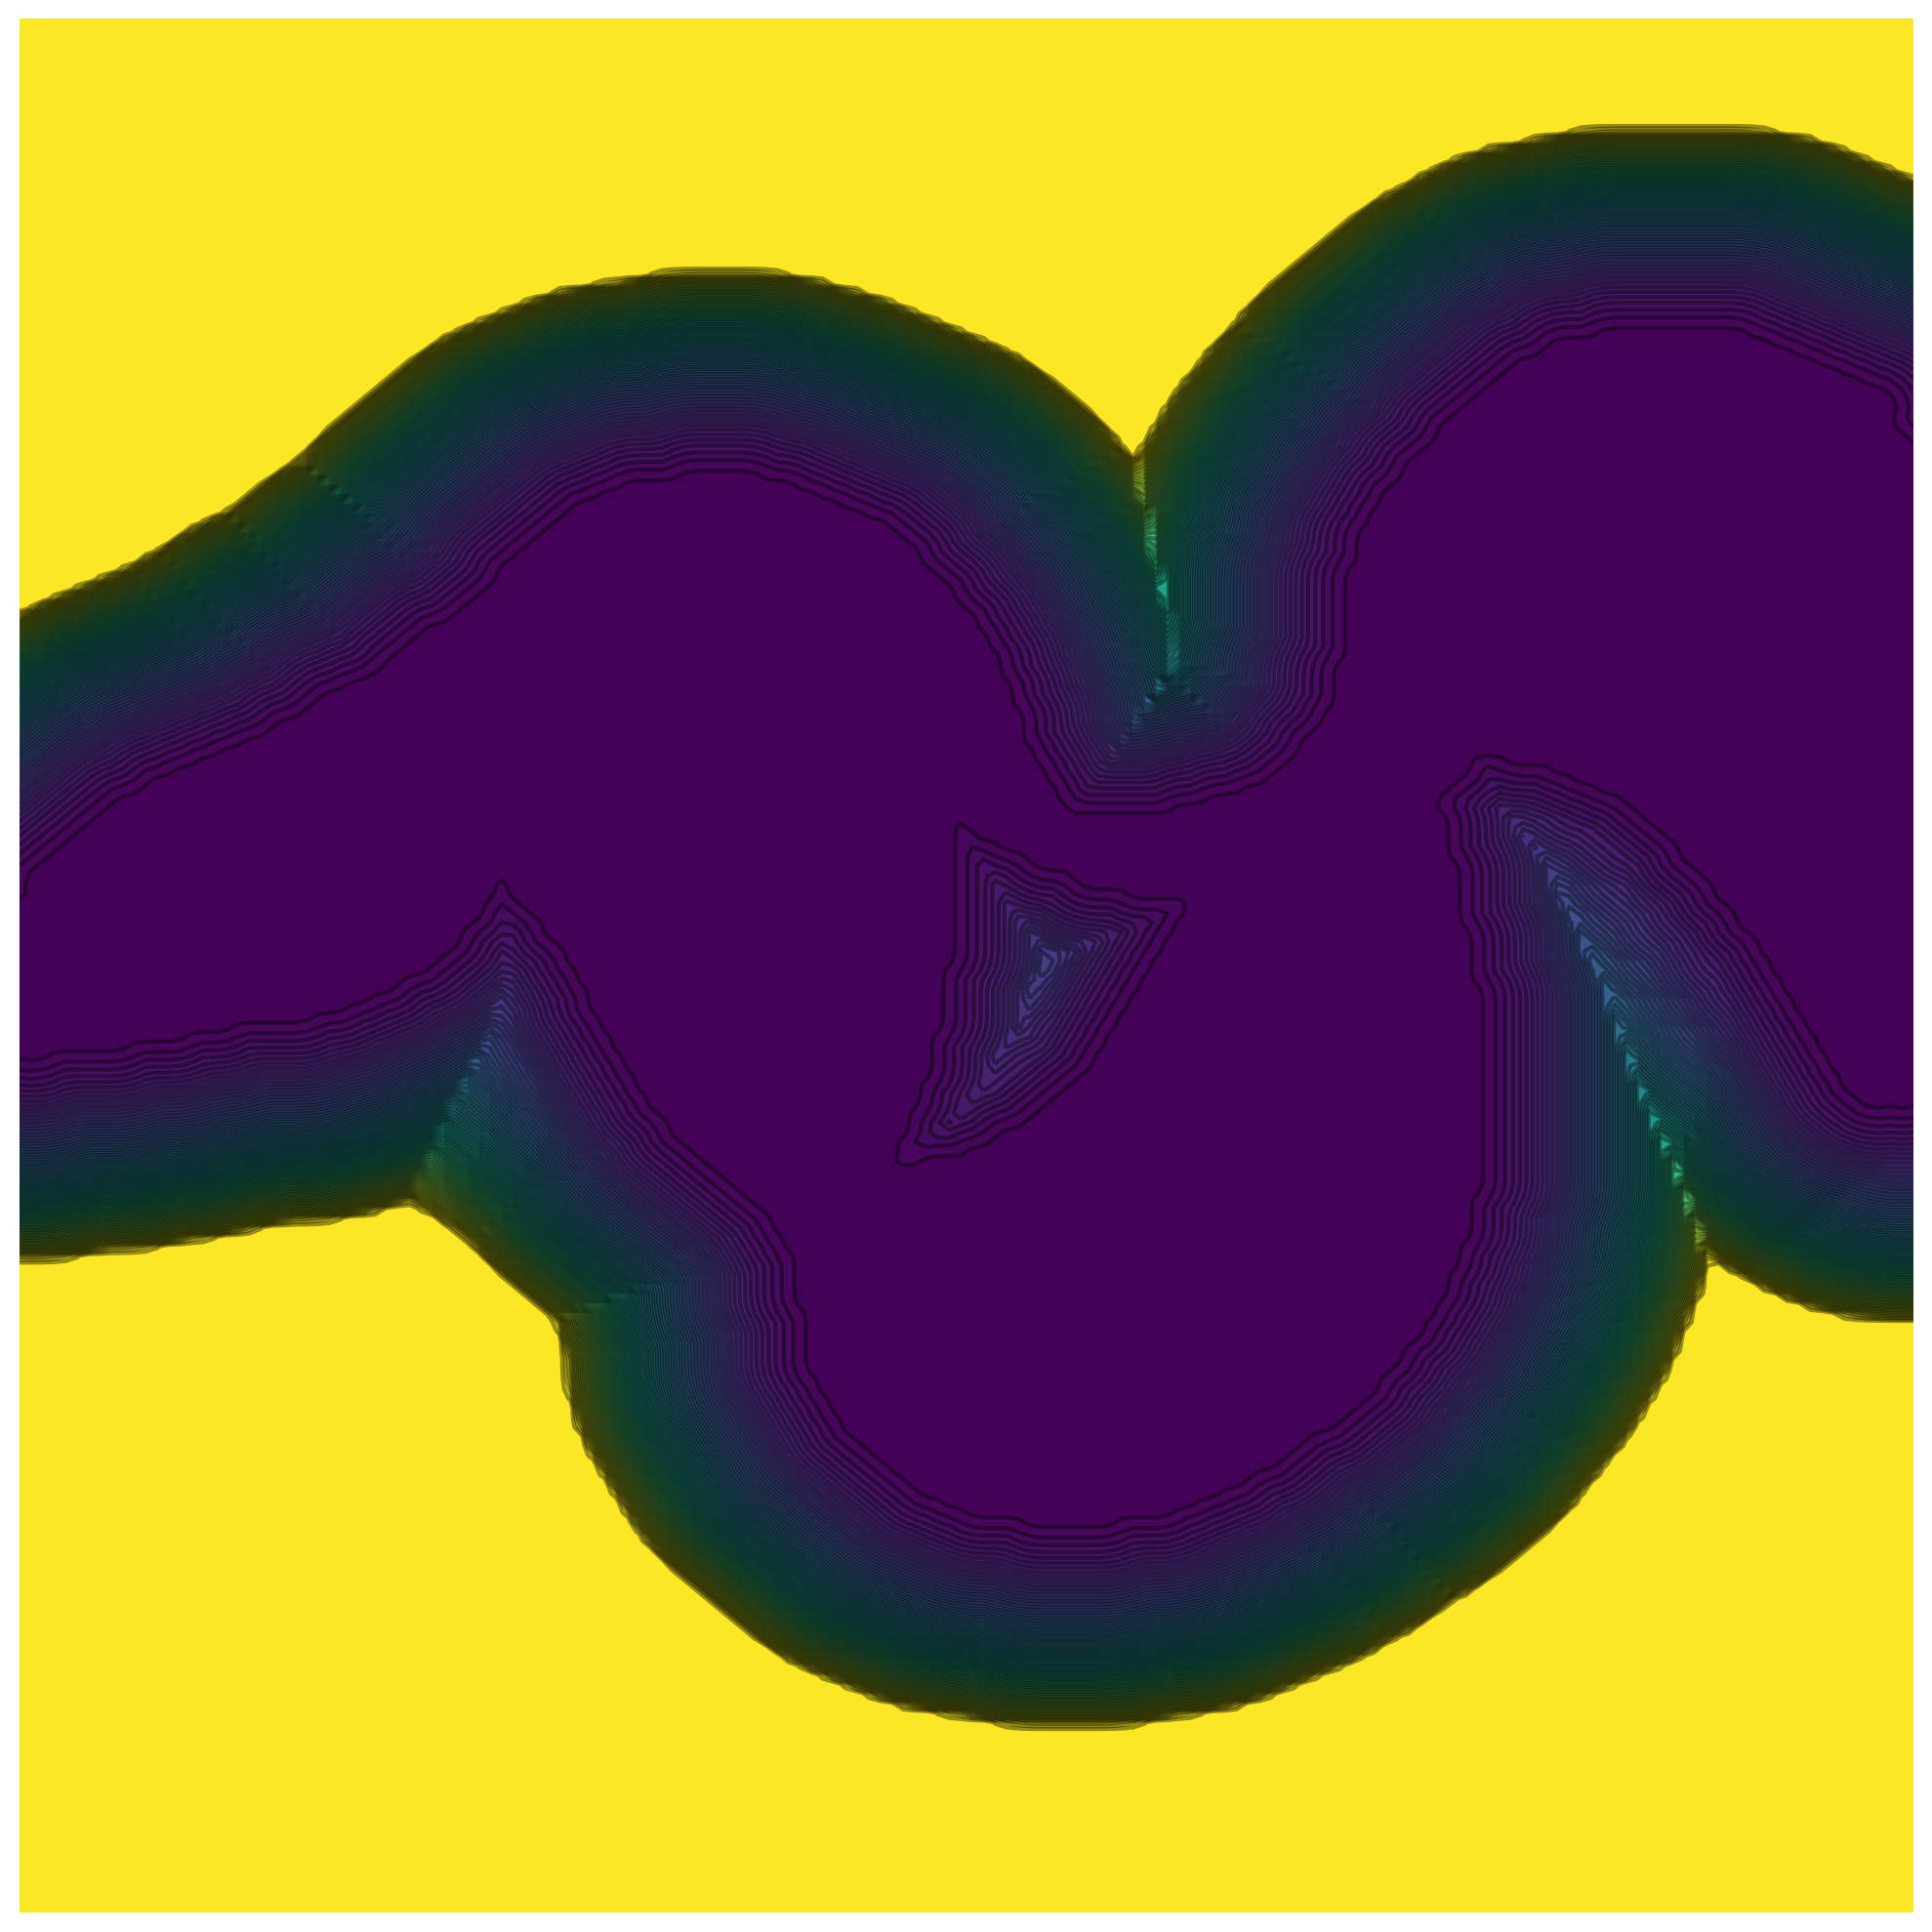

In [11]:
chb_3d.plot_top_and_bottom_surfaces()

In [ ]:
fig1,fig2,fig3 = chb_3d.plot_xsection_PM_MTD(140, 5,indices)

In [ ]:
np.shape(chb_3d.strat)

### PROPERTY MODELING AND EXPORT 

In [ ]:
ny, nx, nz = np.shape(chb_3d.strat)
h = D # channel depth
porosity = np.zeros((ny-1,nx-1,nz-1)) # property grids have to be one element smaller than the actual grid

poro_max=0.35
trend=8

for i in range(zmaps.shape[2]): # only working with channel sands
    hat = np.abs(chb_3d.topo[:,:,4*i+1] - zmaps[:,:,i] + h) # height above thalweg
    th = chb_3d.topo[:,:,4*i+4] - chb_3d.topo[:,:,4*i+3] # thickness of channel deposit
    hat[th==0] = 1000 # set a large HAT value where thickness is zero (we want zero porosity here)
    #t = 0.25*(hat[1:,1:]+hat[1:,:-1]+hat[:-1,1:]+hat[:-1,:-1]) # average HAT for porosity grid
    t = 0.25*(hat[1:,1:]+hat[1:,:-1]+hat[:-1,1:]+hat[:-1,:-1]) # average HAT for porosity grid
    t = t-np.min(t)
    
    #t[t>30] = 30 
    t[t>trend] = trend #lower number means porosity reduces more rapidly into margin
    
    # porosity is a function of elevation (the higher the elevation, the lower the porosity):
    #t = 0.35 - 0.35*(t/30.0)
    t = poro_max - poro_max*(t/trend) #Max porosity is 0.25
    
    porosity[:,:,3*i+2] = t # assign porosity
    
#PAUL CODE - Turn cells either side in model ON or OFF

#porosity[:,:,:]=0

#porosity[:,:,:]=0


porosity[porosity>poro_max] = poro_max
permeability = 10**(17*porosity-3)
permeability[porosity==0] = 0

In [ ]:
# QC porosity volume

plt.figure()
plt.imshow(porosity[:,:,2])
plt.colorbar()

In [ ]:
# QC porosity volume

plt.figure()
plt.imshow(porosity[:,:,305])
plt.colorbar()

In [ ]:
# QC porosity volume

plt.figure()
plt.imshow(porosity[:,:,272])
plt.colorbar()

In [ ]:
np.shape(porosity)

In [ ]:
os.chdir('/Users/paulmorris/Documents/Flow Sim Paper/Fall 2021 New Stuff/Eclipse Models')

In [ ]:
def write_eclipse_grid(strat,porosity,permeability,dx,fname):
    '''function for exporting an Eclipse file ('.grdecl' format)
    from an array of stratigraphic surfaces ('strat') and an array of 
    porosity ('porosity'); (additional 'keywords' like ACTNUM and SATNUM 
    can be added the same way as porosity)

    ordering of cornerpoints for first (uppermost) surface in Eclipse:
    ----------------------------------------
    | 1        2 | 3        4 | 5        6 | 
    |            |            |            |
    | 7        8 | 9       10 | 11      12 |
    ----------------------------------------
    | 13      14 | 15      16 | 17      18 |
    |            |            |            |
    | 19      20 | 21      22 | 23      24 |
    ----------------------------------------

    Inputs:
    strat - stratigraphic surfaces (outputs from channel model)
    porosity - porosity grid
    dx - gridcell size (in meters)
    fname - filename of the Eclipse file to be written
    '''

    # these swaps have to be done because the logic below was written for this ordering of the axes
    surfs = np.swapaxes(strat, 0, 2) 
    surfs = np.swapaxes(surfs, 1, 2)
    porosity = np.swapaxes(porosity, 0, 2)
    porosity = np.swapaxes(porosity, 1, 2)
    permeability = np.swapaxes(permeability, 0, 2)
    permeability = np.swapaxes(permeability, 1, 2)
    
    nz,ny,nx = np.shape(surfs);
    nz=nz-1 # number of cells in z direction
    ny=ny-1 # number of cells in y direction
    nx=nx-1 # number of cells in x direction

    dy=dx  # size of cells in x and y directions

    print('creating cornerpoint array(ZCORN)')
    zcorn = np.zeros((8*nx*ny*nz,))
    for k in range(nz):
        # write cornerpoints for the top of layer 'k':
        surf = np.squeeze(surfs[k,:,:])
        zc = np.zeros((2*ny,2*nx))
        zc[::2,::2] = surf[:-1,:-1]
        zc[1::2,1::2] = surf[1:,1:]
        zc[1::2,::2] = surf[1:,:-1]
        zc[::2,1::2] = surf[:-1,1:]
        zc = np.reshape(zc,(1,4*nx*ny))
        zcorn[(2*k)*4*nx*ny : (2*k+1)*4*nx*ny] = zc;
        
        # write cornerpoints for the bottom of layer 'k':
        surf = np.squeeze(surfs[k+1,:,:])
        zc = np.zeros((2*ny,2*nx));
        zc[::2,::2] = surf[:-1,:-1]
        zc[1::2,1::2] = surf[1:,1:]
        zc[1::2,::2] = surf[1:,:-1]
        zc[::2,1::2] = surf[:-1,1:]
        zc = np.reshape(zc,(1,4*nx*ny))
        zcorn[(2*k+1)*4*nx*ny : (2*k+2)*4*nx*ny] = zc
    zcorn = np.reshape(zcorn, (int(len(zcorn)/8), 8))
    zcorn = 100 * zcorn # convert meters to centimeters

    print('creating pillar matrix (COORD)')
    coord = np.zeros(((nx+1)*(ny+1),6));
    for j in range(ny+1):
        for i in range(nx+1):
            coord[j*(nx+1)+i,0] = i*dx
            coord[j*(nx+1)+i,1] = j*dy
            coord[j*(nx+1)+i,2] = surfs[0,j,i] 
            coord[j*(nx+1)+i,3] = i*dx
            coord[j*(nx+1)+i,4] = j*dy
            coord[j*(nx+1)+i,5] = surfs[-1,j,i]
    coord = 100 * coord # convert meters to centimeters

    print('creating porosity array (PORO)')
    poro = np.zeros((nx*ny*nz,))
    [i,j,k] = np.meshgrid(np.arange(nx),np.arange(ny),np.arange(nz))
    ind1 = k*nx*ny + j*nx+i 
    ind2 = np.ravel_multi_index((k,j,i),(nz,ny,nx))
    poro[ind1] = porosity.flatten()[ind2]
    if np.mod(len(poro),8)==0: # if length of porosity array is a multiple of 8
        poro_1 = np.reshape(poro, (int(len(poro)/8), 8))
    else:
        poro_1 = np.reshape(poro[:-np.mod(len(poro),8)], (int(len(poro)/8), 8))

    print('creating permeability array (PERM)')
    perm = np.zeros((nx*ny*nz,))
    perm[ind1] = permeability.flatten()[ind2]
    if np.mod(len(perm),8)==0: # if length of porosity array is a multiple of 8
        perm_1 = np.reshape(perm, (int(len(perm)/8), 8))
    else:
        perm_1 = np.reshape(perm[:-np.mod(len(perm),8)], (int(len(perm)/8), 8))
    
    # write file:
    fid = open(fname, 'a')
    fid.write('SPECGRID\n')
    fid.write('%d %d %d' %(nx, ny, nz) + ' 1 F /\n')
    fid.write('COORD\n')
    print('writing pillars...')
    for i in range(coord.shape[0]):
        fid.write('%6.3f %6.3f %6.3f %6.3f %6.3f %6.3f\n' %tuple(coord[i,:]))
    fid.write('/\n')
    fid.write(' ')
    fid.write('\n')
    fid.write('ZCORN\n')
    print('writing zcorns...')
    for i in range(zcorn.shape[0]):
        fid.write('%6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f\n' %tuple(zcorn[i,:]))
    fid.write('/\n')
    fid.write(' ')
    fid.write('\n')
    fid.write('PORO\n')
    print('writing porosity...')
    for i in range(poro_1.shape[0]):
        fid.write('%6.4f %6.4f %6.4f %6.4f %6.4f %6.4f %6.4f %6.4f\n' %tuple(poro_1[i,:]))
    if np.mod(len(poro),8)!=0: # if length of porosity array is not a multiple of 8
        for i in range(np.mod(len(poro),8)):
            fid.write('%6.4f ' %poro[-np.mod(len(poro),8):][i])
        fid.write('\n')
    fid.write('/\n')
    fid.write(' ')
    fid.write('\n')
    fid.write('PERMX\n')
    print('writing permeability...')
    for i in range(perm_1.shape[0]):
        fid.write('%6.4f %6.4f %6.4f %6.4f %6.4f %6.4f %6.4f %6.4f\n' %tuple(perm_1[i,:]))
    if np.mod(len(perm),8)!=0: # if length of porosity array is not a multiple of 8
        for i in range(np.mod(len(perm),8)):
            fid.write('%6.4f ' %perm[-np.mod(len(perm),8):][i])
        fid.write('\n')
    fid.write('/\n')
    fid.close()

In [ ]:
dx = 30.0
write_eclipse_grid(-1*(chb_3d.strat[:,:,::-1]-500), porosity[:,:,::-1], permeability[:,:,::-1], dx, 'L_kl1.5_SD2.9_v2.grdecl')



### SHOW 3D MODEL MAYAVI

In [12]:
import blockdiagram_Paul as bd
from mayavi import mlab 
reload(bd)
%matplotlib qt

mlab.figure(bgcolor=(1,1,1)) 
ve = 2.0 # vertical exaggeration
scale = 0.1 # scaling of diagram (important for 3D printing)
strat_switch = 1 # equals 1 if you want stratigraphy displayed on the sides
layers_switch = 0 # equals 1 if you want stratigraphic boundaries displayed on the sides
contour_switch = 1 # equals 1 if you want contours displayed on the top surface
dx = 30.0 # cell size for display
bottom = np.min(chb_3d.strat) - 1.5 # elevation of bottom side of diagram
color_mode = 'facies' # determines how the stratigraphy will be colored; can be 'property', 'facies', or 'time'
colors = [[0.5,0.5,0.5],[0.9,0.9,0],[0.5,0.5,0.5]] # colors for 'facies' display
line_thickness = 1.0 # thickness of lines if 'layers_switch' is 1
gap = 120 # distance between exploded blocks (if any; in number of gridcells)
h = h # channel depth (m)
nx = 1 # number of blocks in x direction
ny = 1
export = 0
bd.create_exploded_view(chb_3d.strat,chb_3d.facies,chb_3d.topo,h,nx,ny,gap,dx,ve,scale,strat_switch,
                        layers_switch,contour_switch,color_mode,colors,line_thickness,bottom,export)

Percent: [####################] 99.64539007092199%  block 1 done, out of 1 blocks


In [ ]:
gap=120
bd.create_exploded_view(chb_3d.strat,chb_3d.facies,chb_3d.topo,h,2,2,gap,dx,ve,scale,strat_switch,
                        layers_switch,contour_switch,color_mode,colors,line_thickness,bottom,export)

#### Create fence diagram

In [ ]:
mlab.figure(bgcolor=(1,1,1))
bd.create_fence_diagram(chb_3d.strat,chb_3d.facies,chb_3d.topo,h,4,2,gap,dx,ve,scale,layers_switch,color_mode,colors,line_thickness,bottom,export)